In [9]:
import pandas as pd
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
df.drop('customerID', axis=1, inplace=True)

## Identify the categorical columns in the dataframe.

### Subtask:
Identify the categorical columns in the dataframe.


**Reasoning**:
Identify and store the names of categorical columns.



In [14]:
categorical_cols = [col for col in df.columns if df[col].dtype in ['object', 'category']]
print("Categorical columns:", categorical_cols)

Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


## Apply label encoding to the identified categorical columns.

### Subtask:
Apply label encoding to the identified categorical columns.


In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

display(df.head())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [13]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


# Task
Build a decision tree classifier for the dataset, drop the `customerID` column, perform label encoding on all categorical columns, and perform hyperparameter optimization with k-fold cross-validation.

## Split the data

### Subtask:
Split the dataset into training and testing sets.


**Reasoning**:
Split the dataset into training and testing sets using `train_test_split`.



In [16]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Define the model and hyperparameter grid

### Subtask:
Define the Decision Tree Classifier model and the hyperparameter grid for optimization.


**Reasoning**:
Define the Decision Tree Classifier model and the hyperparameter grid for optimization.



In [17]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

## Perform hyperparameter optimization with cross-validation

### Subtask:
Use GridSearchCV or RandomizedSearchCV to find the best hyperparameters with k-fold cross-validation.


**Reasoning**:
Import GridSearchCV and perform hyperparameter optimization using GridSearchCV with 5-fold cross-validation on the training data.



In [18]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

## Evaluate the model

### Subtask:
Evaluate the performance of the best model on the test set.


**Reasoning**:
Evaluate the performance of the best model on the test set using accuracy, precision, recall, and F1-score.



In [19]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.7942
Precision: 0.6203
Recall: 0.5737
F1-score: 0.5961


In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1036
           1       0.62      0.57      0.60       373

    accuracy                           0.79      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.79      0.79      1409



In [21]:
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

## Iterate through thresholds and calculate recall

### Subtask:
Iterate through a range of possible thresholds and calculate the recall score for each threshold.


**Reasoning**:
Iterate through a range of possible thresholds and calculate the recall score for each threshold, storing the results.



In [22]:
import numpy as np
from sklearn.metrics import recall_score

thresholds = np.arange(0, 1.01, 0.01)
recall_scores = {}

for threshold in thresholds:
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)
    recall = recall_score(y_test, y_pred_threshold)
    recall_scores[threshold] = recall


## Find the optimal threshold

### Subtask:
Identify the threshold that yields the highest recall score.


**Reasoning**:
Find the threshold with the maximum recall score from the `recall_scores` dictionary and store it in the `optimal_threshold` variable.



In [23]:
optimal_threshold = max(recall_scores, key=recall_scores.get)
print(f"Optimal Threshold for Maximum Recall: {optimal_threshold:.4f}")

Optimal Threshold for Maximum Recall: 0.0000


## Evaluate the model with the optimal threshold

### Subtask:
Evaluate the model's performance on the test set using the optimal threshold, including precision, recall, and F1-score.


**Reasoning**:
Evaluate the performance of the best model on the test set using the optimal threshold, including precision, recall, and F1-score.



In [24]:
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
precision_optimal = precision_score(y_test, y_pred_optimal)
recall_optimal = recall_score(y_test, y_pred_optimal)
f1_optimal = f1_score(y_test, y_pred_optimal)

print(f"Accuracy with Optimal Threshold: {accuracy_optimal:.4f}")
print(f"Precision with Optimal Threshold: {precision_optimal:.4f}")
print(f"Recall with Optimal Threshold: {recall_optimal:.4f}")
print(f"F1-score with Optimal Threshold: {f1_optimal:.4f}")

Accuracy with Optimal Threshold: 0.2647
Precision with Optimal Threshold: 0.2647
Recall with Optimal Threshold: 1.0000
F1-score with Optimal Threshold: 0.4186


# Task
Build a decision tree classifier for the dataset, drop the `customerID` column, and perform label encoding on all categorical columns. Perform hyperparameter optimization on all parameters using k-fold cross-validation. Print the classification report. Then, perform threshold optimization to improve recall while maintaining other metrics. Print the classification report with the optimized threshold.

## Get prediction probabilities

### Subtask:
Obtain the prediction probabilities for the positive class on the test set.


**Reasoning**:
Obtain the prediction probabilities for the positive class on the test set using the best model.



In [25]:
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

## Iterate through thresholds and calculate metrics

### Subtask:
Iterate through a range of possible thresholds and calculate precision, recall, and F1-score for each threshold.


**Reasoning**:
Iterate through a range of possible thresholds and calculate precision, recall, and F1-score for each threshold, storing the results in a dictionary.



In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = np.arange(0, 1.01, 0.01)
metrics_by_threshold = {}

for threshold in thresholds:
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_threshold, zero_division=0)
    recall = recall_score(y_test, y_pred_threshold)
    f1 = f1_score(y_test, y_pred_threshold)
    metrics_by_threshold[threshold] = {'precision': precision, 'recall': recall, 'f1': f1}


## Find the optimal threshold (considering balance)

### Subtask:
Identify the threshold that offers a good balance between recall and other metrics (e.g., maximizing F1-score or choosing based on a precision-recall curve).


**Reasoning**:
Find the threshold that maximizes the F1-score from the calculated metrics.



In [27]:
balanced_optimal_threshold = max(metrics_by_threshold, key=lambda threshold: metrics_by_threshold[threshold]['f1'])
print(f"Optimal Threshold for Balanced Metrics (Max F1-score): {balanced_optimal_threshold:.4f}")

Optimal Threshold for Balanced Metrics (Max F1-score): 0.3500


**Reasoning**:
Evaluate the performance of the model on the test set using the balanced optimal threshold and print the classification report.



In [28]:
y_pred_balanced_optimal = (y_pred_proba >= balanced_optimal_threshold).astype(int)

print("Classification Report with Balanced Optimal Threshold:")
print(classification_report(y_test, y_pred_balanced_optimal))

Classification Report with Balanced Optimal Threshold:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1036
           1       0.55      0.71      0.62       373

    accuracy                           0.77      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.79      0.77      0.78      1409



## Evaluate the model with the optimal threshold

### Subtask:
Evaluate the model's performance on the test set using the chosen optimal threshold, including precision, recall, and F1-score.


**Reasoning**:
Evaluate the performance of the best model on the test set using the balanced optimal threshold, including precision, recall, and F1-score.



In [29]:
y_pred_balanced_optimal = (y_pred_proba >= balanced_optimal_threshold).astype(int)

accuracy_balanced_optimal = accuracy_score(y_test, y_pred_balanced_optimal)
precision_balanced_optimal = precision_score(y_test, y_pred_balanced_optimal)
recall_balanced_optimal = recall_score(y_test, y_pred_balanced_optimal)
f1_balanced_optimal = f1_score(y_test, y_pred_balanced_optimal)

print(f"Accuracy with Balanced Optimal Threshold: {accuracy_balanced_optimal:.4f}")
print(f"Precision with Balanced Optimal Threshold: {precision_balanced_optimal:.4f}")
print(f"Recall with Balanced Optimal Threshold: {recall_balanced_optimal:.4f}")
print(f"F1-score with Balanced Optimal Threshold: {f1_balanced_optimal:.4f}")

Accuracy with Balanced Optimal Threshold: 0.7679
Precision with Balanced Optimal Threshold: 0.5477
Recall with Balanced Optimal Threshold: 0.7078
F1-score with Balanced Optimal Threshold: 0.6175


## Plot a heatmap of the confusion matrix

### Subtask:
Generate and display a heatmap of the confusion matrix.

**Reasoning**:
Import `confusion_matrix` from `sklearn.metrics` and `seaborn` for plotting. Calculate the confusion matrix using the true and predicted labels from the test set and plot it as a heatmap using `seaborn.heatmap`.

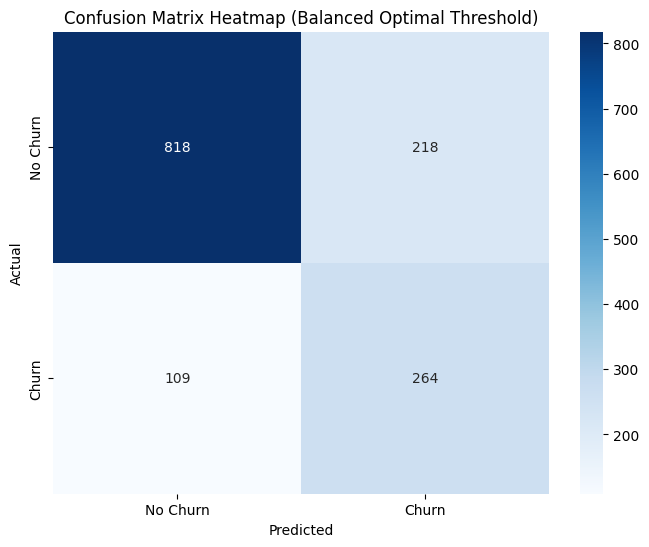

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_balanced_optimal)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap (Balanced Optimal Threshold)')
plt.show()

In [31]:
import joblib

# Save the best model
joblib.dump(best_model, 'best_decision_tree_model.pkl')

# Save the balanced optimal threshold
joblib.dump(balanced_optimal_threshold, 'balanced_optimal_threshold.pkl')

print("Best model and balanced optimal threshold saved successfully.")

Best model and balanced optimal threshold saved successfully.


# Task
Visualize the trained decision tree model using graphviz.

## Install necessary libraries

### Subtask:
Install the `graphviz` library.


**Reasoning**:
Install the `graphviz` library using pip.



In [32]:
%pip install graphviz

## Export the decision tree

### Subtask:
Export the trained decision tree model to a Graphviz .dot file.


**Reasoning**:
Export the trained decision tree model to a Graphviz .dot file as requested in the subtask.



In [33]:
from sklearn.tree import export_graphviz

export_graphviz(best_model, out_file='decision_tree.dot',
                feature_names=X_train.columns,
                class_names=[str(i) for i in y_train.unique()],
                filled=True, rounded=True, special_characters=True)

## Visualize the decision tree

### Subtask:
Render the .dot file as a graphical visualization.


**Reasoning**:
Render the .dot file as a graphical visualization.



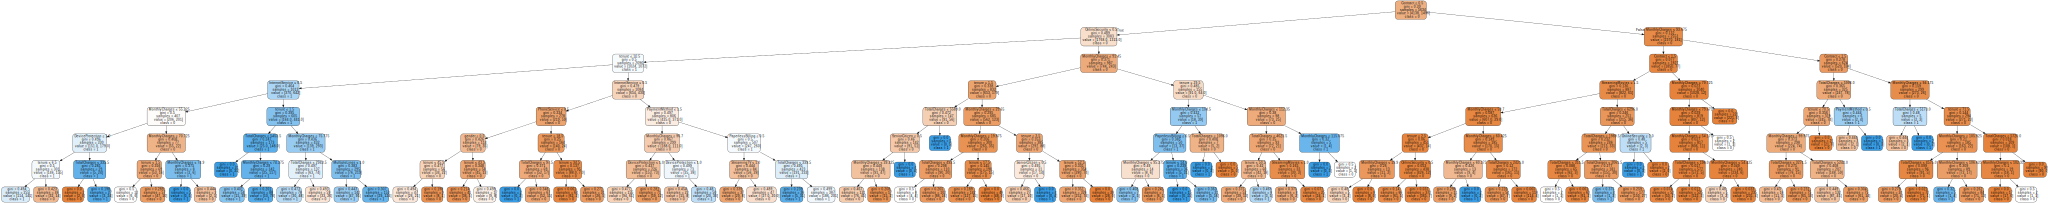

In [34]:
import graphviz

with open("decision_tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)